# Исследование объявлений о продаже квартир

**Цели исследования**:
1. Изучить параметры цены, площади, числа комнат, высоты потолков. Построить для них гистограммы.
2. Изучить время продажи квартиры. Изучить данные о слишком быстрых и слишком долгих продажах и объяснить их.
3. Избавиться от "выбросов" в данных.
4. Изучить влияние различных факторов на цену квартиры.
5. Изучить данные о 10 городах с наименьшим количеством объявлений.
6. Изучить как меняется цена в зависимости от расстояния до центра города на примере Санкт-Петербурга.
7. Изучить квартиры в центре города и цены на них.

## Изучение данных из файла

Прочитаем предоставленные нам данные и оценим их:

In [1]:
import pandas as pd
df = pd.read_csv('datasets/real_estate_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                           --------------  ----- 
 0   total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around

Как мы видим, возникает проблема с разделителем. Избавимся от неё:

In [2]:
df = pd.read_csv('datasets/real_estate_data.csv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

Итак, у нас имеются данные о недвижимости.

Имеются пропуски в следующих столбцах: `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition`.
Позднее мы изучим эти пропуски подробнее и избавимся от них.

Приступим к предобработке данных.

## Предобработка данных

Посчитаем и изучим подробнее количество пропусков.

In [4]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Доля данных с пропусками от общей длины датафрема:

In [5]:
df.isna().mean().sort_values(ascending = False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
cityCenters_nearest     0.232879
ponds_around3000        0.232837
parks_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

Начнем заполнение пропусков в порядке убывания их количества.

In [6]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

Итого имеем: столбец типа object с данными типа bool внутри, кроме того с большим количеством пропусков. Общей закономерности в зависимоти цены и площади от типа помещения не наблюдается, поэтому все что мы можем сделать с этим столбцом - заполнить пропуски плейсхолдером `unknown`

In [7]:
df['is_apartment'] = df['is_apartment'].fillna('unknown')

In [8]:
df['is_apartment'].unique()

array(['unknown', False, True], dtype=object)

От пропусков в столбце типа помещения мы избавились, перейдем к следующему стоблбцу `parks_nearest`. Так как это расстояние до ближайшего парка, будем считать, что ближайший парк находится слишком далеко, что бы его учитывать. Для заполнения пропусков в этом столбце возьмем максимальное имеющееся расстояние до парка в столбце и умножим его на 2. Но для начала проверим, если ли среди них такие стоки, где указан парк в радиусе 3000 местров, но отсутствует расстояние до парка в колонке `parks_nearest`.

In [9]:
df[(df['parks_around3000'] < 1) | df['parks_around3000'].isna()]['parks_nearest'].isna().sum()

15620

Число пропусков совпадает, значит нет таких строк, где при отсутствующем расстоянии до ближайшего парка есть указание на наличие парков в радиусе 3 км. Заполним пропуски, приняв для пропущенных ячеек минимальное расстояние до парка, равное удвоенному максимальному значению до ближайшего парка.

In [10]:
display(df['parks_nearest'].median())
df['parks_nearest'].describe()

455.0

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [11]:
df['parks_nearest'] = df['parks_nearest'].fillna(df['parks_nearest'].max() * 2)

In [12]:
df['parks_nearest'].isna().sum()

0

От пропусков в колонце расстояния до ближайшего парка мы избавились. Проделаем все то же самое, но для водоемов.

In [13]:
df[(df['ponds_around3000'] < 1) | df['ponds_around3000'].isna()]['ponds_nearest'].isna().sum()

14589

In [14]:
display(df['ponds_nearest'].median())
df['ponds_nearest'].describe()

502.0

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [15]:
df['ponds_nearest'] = df['ponds_nearest'].fillna(df['ponds_nearest'].max() * 3)

In [16]:
df['ponds_nearest'].isna().sum()

0

От пропусков в расстоянии до водоемов избавились. Переходим к пропускам в столбце балконов.

In [17]:
df['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Мы видим, что всегда указано целое количество балконов (и это логично, сомневаюсь что где-то можно найти квартиру с половиной балкона). Изучим значения в этом стоблце и заполним пропуски самым часто встречающимся. И разумеется, приведем данные в столбце к типу данных `int`

In [18]:
df.groupby('balcony')['balcony'].count()

balcony
0.0    3758
1.0    4195
2.0    3659
3.0      81
4.0     183
5.0     304
Name: balcony, dtype: int64

Чаще всего встречаются помещения с 0, 1 и 2мя балконами. Проверим зависимость количества балконов от количества комнат.

In [19]:
df.groupby(['rooms'])['balcony'].median()

rooms
0     2.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     0.0
9     0.5
10    1.0
11    NaN
12    NaN
14    0.0
15    NaN
16    1.0
19    NaN
Name: balcony, dtype: float64

Чаще всего по 1 балкону на квартиру. Заполняем пропуска в столбце `balcony` единицами и идем дальше.

In [20]:
df['balcony'] = df['balcony'].fillna(1).astype('int')

In [21]:
df['balcony'].isna().sum()

0

Далее у нас идет высота потолков (столбец `ceiling_height`). Заполним пропуски медианным значением.

In [22]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [23]:
df['ceiling_height'].isna().sum()

0

Далее у нас идет расстояние до аэропорта. Пожалуй, поступим также как и с водоемами и парками, укажем расстояние в 2 раза больше максимально встречающегося.

In [24]:
df['airports_nearest'] = df['airports_nearest'].fillna(df['airports_nearest'].max() * 2)

In [25]:
df['airports_nearest'].isna().sum()

0

Далее идет расстояние до центра города. Также заполняем значениями в 2 раза больше максимального.

In [26]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df['cityCenters_nearest'].max() * 2)

In [27]:
df['cityCenters_nearest'].isna().sum()

0

Прожолжаем заполнять. Дальше на очереди парки и водоемы в радиусе 3 км. Проверим, не закралась ли ошибка в эти данные:

In [28]:
df[df['parks_around3000'].isna() & (df['parks_nearest'] >= 3000)]['parks_around3000'].count() 

0

In [29]:
df[df['ponds_around3000'].isna() & (df['ponds_nearest'] >= 3000)]['ponds_around3000'].count() 

0

Отлично, ошибок нет. Заполняем эти столбцы нулями, и приводим их к формату `int`.

In [30]:
df['parks_around3000'] = df['parks_around3000'].fillna(0).astype('int')

In [31]:
df['parks_around3000'].isna().sum()

0

In [32]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0).astype('int')

In [33]:
df['ponds_around3000'].isna().sum()

0

Далее идет столбец с временем публикации объявление. Заполним пропуски медианными значениями и приведем их типу данных `int`:

In [34]:
df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].median()).astype('int')

In [35]:
df['days_exposition'].isna().sum()

0

Далее у нас идет столбец с площадью кухни. Тут не все так просто, поскольку существуют квартиры-студии, в которых, по сути, кухня не является отдельной комнатой, поэтому там может быть не указан метраж кухни отдельно. Проверим есть ли такие квартиры в датасете:

In [36]:
df[df['kitchen_area'].isna()].groupby('studio')['studio'].count()

studio
False    2129
True      149
Name: studio, dtype: int64

Еще в датасете присутствуют данные о помещениях со свободной планировкой:

In [37]:
df[df['kitchen_area'].isna()].groupby('open_plan')['open_plan'].count()

open_plan
False    2211
True       67
Name: open_plan, dtype: int64

Такие квартиры есть, следовательно в них мы просто зануляем метраж кухни, а в остальных заполним медианным значением для каждого количества комнат в помещении.

In [38]:
df.loc[df['kitchen_area'].isna() & ((df['studio'] == True) | (df['open_plan'] == True)), 'kitchen_area'] = df[df['kitchen_area'].isna() & ((df['studio'] == True) | (df['open_plan'] == True))]['kitchen_area'].fillna(0)

In [39]:
df['kitchen_area'].isna().sum()

2062

In [40]:
for room in df['rooms'].unique():
    df.loc[df['kitchen_area'].isna() & df['rooms'].isin([room]), 'kitchen_area'] = df[df['kitchen_area'].isna() & df['rooms'].isin([room])]['kitchen_area'].fillna(df[df['rooms'].isin([room])]['kitchen_area'].median())

In [41]:
df['kitchen_area'].isna().sum()

0

Перейдем к заполнению пропусков в столбце с жилой площадью `living_area`. Поступим также, как и с площадью кухонь. Заполним медианным значением пропуски исходя из количества комнат:

In [42]:
for room in df['rooms'].unique():
    df.loc[df['living_area'].isna() & df['rooms'].isin([room]), 'living_area'] = df[df['living_area'].isna() & df['rooms'].isin([room])]['living_area'].fillna(df[df['rooms'].isin([room])]['living_area'].median())

In [43]:
df['living_area'].isna().sum()

0

Далее на очереди пропуски в графе `floors_total` - количество этажей в здании. Тут так просто угадать не выйдет, но предполагать все же можно. Обычно самые популярные по количеству этажей здания - 1, 5, 9 и многоэтажки. Пропусков в разделе с указанием на каком этаже находится помещение у нас нет, поэтому заполним пропуски следуя из логики, что если помещение на 1ом этаже, то это одноэтажное здание, менее либо равно 5 - пятиэтажное, менее и равно 9 - девятиэтажное, если этаж больше 9, то будем считать его последним этажом в здании:

In [44]:
df.groupby('floors_total')['floors_total'].count().sort_values(ascending = False).head(5)

floors_total
5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
Name: floors_total, dtype: int64

In [45]:
def floor_predict(floor):
    if floor <= 1:
        return 1
    elif 1 < floor <= 5:
        return 5
    elif 5 < floor <= 9:
        return 9
    else:
        return floor

In [46]:
df.loc[df['floors_total'].isna(), 'floors_total'] = df[df['floors_total'].isna()]['floor'].apply(floor_predict)

In [47]:
df['floors_total'].isna().sum()

0

Последний столбец с пропусками - населенный пункт, в котором находится помещение. Тут мы никак не угадаем расположение, поэтому заполним пропуски филлером `unknown`

In [48]:
df['locality_name'] = df['locality_name'].fillna('unknown')

In [49]:
df['locality_name'].isna().sum()

0

Проверим наши замены и еще раз проверим тип данных в столбцах:

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int32  
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Мы можем перезаписать колонку с последней ценой в формате `int` вместо `float`, остальные данные оставляем так, как они есть.

In [51]:
df['last_price'] = df['last_price'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')

Приведем данные о дате продажи в приемлемый вид:

In [52]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT00:00:00')

## Расчёты и добавление результатов в таблицу

Расчитаем и добавим в таблицу столбец с ценой за квадратный метр для каждого из помещений:

In [53]:
df['price_per_meter'] = df['last_price'] / df['total_area']
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,unknown,...,1,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95,120370.370370
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.6,1,unknown,...,2,посёлок Шушары,12817.0,18603.0,0,6380.0,0,4032.0,81,82920.792079
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.3,4,unknown,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.714286
3,0,64900000,159.00,2015-07-24,3,2.65,14,45.0,9,unknown,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.100629
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,unknown,...,1,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,unknown,...,1,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,95,72490.845228
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.0,4,unknown,...,1,Тосно,169738.0,131936.0,0,6380.0,0,4032.0,45,52542.372881
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.7,1,unknown,...,1,село Рождествено,169738.0,131936.0,0,6380.0,0,4032.0,95,44091.710758
23697,13,11475000,76.75,2017-03-28,2,3.00,17,30.5,12,unknown,...,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602,149511.400651


Добавим в таблицу данные о дне недели, месяце и годе выставления объявления:

In [54]:
df['day_of_week'] = df['first_day_exposition'].dt.day_name()
df['month'] = df['first_day_exposition'].dt.month_name()
df['year'] = df['first_day_exposition'].dt.year
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_week,month,year
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,unknown,...,16028.0,1,482.0,2,755.0,95,120370.370370,Thursday,March,2019
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.6,1,unknown,...,18603.0,0,6380.0,0,4032.0,81,82920.792079,Tuesday,December,2018
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.3,4,unknown,...,13933.0,1,90.0,2,574.0,558,92785.714286,Thursday,August,2015
3,0,64900000,159.00,2015-07-24,3,2.65,14,45.0,9,unknown,...,6800.0,2,84.0,3,234.0,424,408176.100629,Friday,July,2015
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,unknown,...,8098.0,2,112.0,1,48.0,121,100000.000000,Tuesday,June,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,unknown,...,4232.0,1,796.0,3,381.0,95,72490.845228,Tuesday,March,2017
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.0,4,unknown,...,131936.0,0,6380.0,0,4032.0,45,52542.372881,Monday,January,2018
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.7,1,unknown,...,131936.0,0,6380.0,0,4032.0,95,44091.710758,Sunday,February,2018
23697,13,11475000,76.75,2017-03-28,2,3.00,17,30.5,12,unknown,...,10364.0,2,173.0,3,196.0,602,149511.400651,Tuesday,March,2017


Далее добавим столбец в таблицу, в котором указан этаж на котором находится помещение (первый, последний или другой):

In [55]:
df['floor_type'] = 'other'
df['floor_type'] = df['floor_type'].where(df['floor'] != 1, 'first')
df['floor_type'] = df['floor_type'].where(df['floor'] != df['floors_total'], 'last')

Ну и последнее, что нам необходимо добавить в таблицу: отношение жилой площади помещения к общей и отношение площади кухни к общей:

In [56]:
df['living_total_raito'] = df['living_area'] / df['total_area']
df['kitchen_total_raito'] = df['kitchen_area'] / df['total_area']
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_week,month,year,floor_type,living_total_raito,kitchen_total_raito
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,unknown,...,2,755.0,95,120370.370370,Thursday,March,2019,other,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.6,1,unknown,...,0,4032.0,81,82920.792079,Tuesday,December,2018,first,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.3,4,unknown,...,2,574.0,558,92785.714286,Thursday,August,2015,other,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,2.65,14,45.0,9,unknown,...,3,234.0,424,408176.100629,Friday,July,2015,other,0.283019,0.059748
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,unknown,...,1,48.0,121,100000.000000,Tuesday,June,2018,other,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,unknown,...,3,381.0,95,72490.845228,Tuesday,March,2017,other,0.547792,0.103356
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.0,4,unknown,...,0,4032.0,45,52542.372881,Monday,January,2018,other,0.644068,0.144068
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.7,1,unknown,...,0,4032.0,95,44091.710758,Sunday,February,2018,first,0.523810,0.155203
23697,13,11475000,76.75,2017-03-28,2,3.00,17,30.5,12,unknown,...,3,196.0,602,149511.400651,Tuesday,March,2017,other,0.397394,0.303583


## Исследовательский анализ данных

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

Переходим к анализу данных. Для начала изучим данные о площади помещений.

In [58]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Text(0.5, 1.0, 'Площадь квартиры')

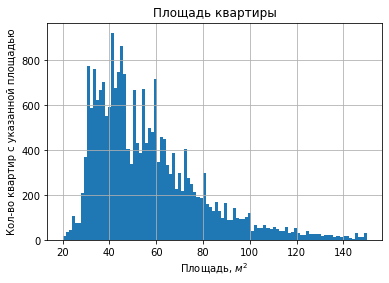

In [59]:
ax = df['total_area'].hist(bins=100, range=(20,150))
ax.set_xlabel(xlabel='Площадь, $м^2$')
ax.set_ylabel(ylabel='Кол-во квартир с указанной площадью')
ax.set_title('Площадь квартиры')

Слишком большие максимальные и слишком маленькие минимальные. Также следует отметить большое количество помещений с жилой площадью около 30 $м^2$ и 45 $м^2$. 

Избавимся от слишком малых и слишком больших значений жилых площадей. Возьмем за нормальную жилую площадь промежуток между 25 и 50 $м^2$:

Text(0.5, 1.0, 'Площадь квартиры')

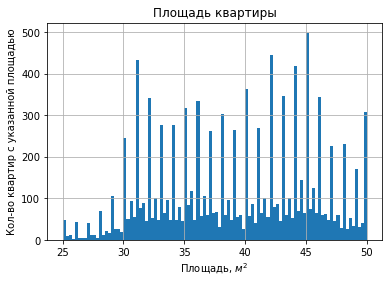

In [60]:
ax = df.query('25 <= total_area <= 100')['total_area'].hist(bins=100, range = (25,50))
ax.set_xlabel(xlabel='Площадь, $м^2$')
ax.set_ylabel(ylabel='Кол-во квартир с указанной площадью')
ax.set_title('Площадь квартиры')

При рассмотрении этой гистограммы мы можем заметить, что она идет волнами. Исходя из этого, можно предположить что существуют стандартные планировки, площадь которых совпадает.

In [61]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Text(0.5, 1.0, 'Стоимость квартиры')

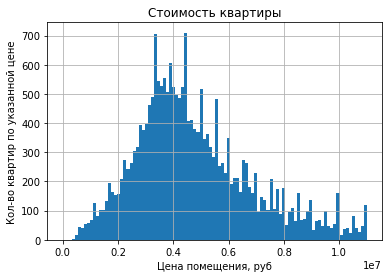

In [62]:
ax = df['last_price'].hist(bins=100, range = (0, 11000000))
ax.set_xlabel(xlabel='Цена помещения, руб')
ax.set_ylabel(ylabel='Кол-во квартир по указанной цене')
ax.set_title('Стоимость квартиры')

Ситуация такая же: минимальные и максимальные значения не соответствуют ожиданиям. Но гистограмма более-менее ровная, напоминает нормальное распределение. Наконец, рассмотрим высоту потолков:

In [63]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Text(0.5, 1.0, 'Высота потолков в квартирах')

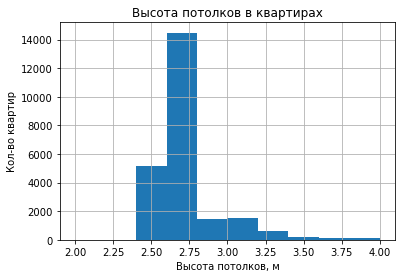

In [64]:
ax = df['ceiling_height'].hist(bins=10, range=(2,4))
ax.set_xlabel(xlabel='Высота потолков, м')
ax.set_ylabel(ylabel='Кол-во квартир')
ax.set_title('Высота потолков в квартирах')

Согласно СНиПам высота потолка должа быть в районе 2,5-2,7 м для жилых помещений. Как мы видим, большинство помещений соответствуют стандартам. Остальные данные для жилых помещений выглядят нереалистино, хотя нежилые помещения могут нормироваться и бОльшей высотой потолка.

Изучим время продажи квартиры:

In [65]:
df['days_exposition'].describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

Text(0.5, 1.0, 'Время продажи квартиры')

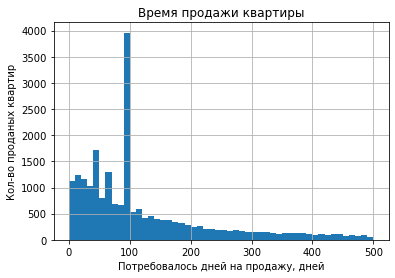

In [66]:
ax = df['days_exposition'].hist(bins=50, range=(0,500))
ax.set_xlabel(xlabel='Потребовалось дней на продажу, дней')
ax.set_ylabel(ylabel='Кол-во проданых квартир')
ax.set_title('Время продажи квартиры')

Как мы видим, имеется очень выделяющийся пик продажи помещений на отметке около 100 дней. Это возникло из-за нашего заполнения пропусков. Если не обращать на него внимания, то мы видим, что большенство помещений продается не дольше 200 дней. Обычно помещения продаются около 150 дней. Необычно быстрой продажей можно считать продаже быстрее 45 дней, необычно долгой - больше 200 дней.

Изучим факторы, влияющие на стоимость квартиры:

In [67]:
df.corr()['last_price'].sort_values(ascending = False)

last_price             1.000000
price_per_meter        0.736499
total_area             0.653675
living_area            0.556066
kitchen_area           0.450682
rooms                  0.363343
ponds_around3000       0.208621
parks_around3000       0.197840
total_images           0.104473
days_exposition        0.065469
ceiling_height         0.064425
floor                  0.026576
balcony                0.020631
floors_total          -0.006920
open_plan             -0.008802
studio                -0.025362
living_total_raito    -0.036802
year                  -0.043089
kitchen_total_raito   -0.103613
parks_nearest         -0.166338
ponds_nearest         -0.168957
airports_nearest      -0.170848
cityCenters_nearest   -0.200258
Name: last_price, dtype: float64

<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

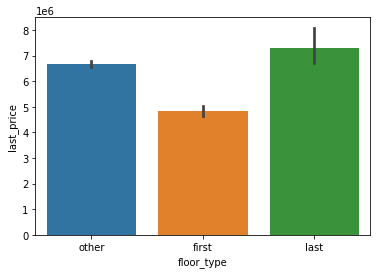

In [68]:
sns.barplot(data = df, x='floor_type', y='last_price')

Итак, на стоимость квартиры в основном влияет цена за квадратный метр, площадь квартиры (от которой зависит и жилая площадь, и площадь кухни и количество комнат). Также наблюдается небольшая зависимость от наличия водоемов и парков в радиусе 3км. При отдалении от центра города также наблюдается снижение цены.

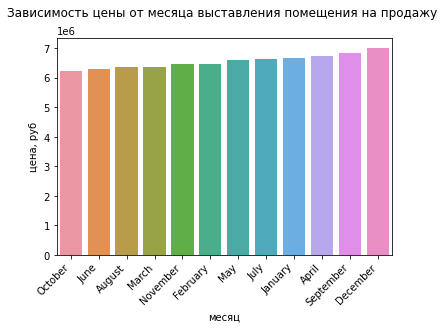

In [69]:
ax = sns.barplot(data = df.groupby('month')['last_price'].mean().reset_index().sort_values('last_price'), x='month', y = 'last_price')
ax.set_title('Зависимость цены от месяца выставления помещения на продажу \n')
ax.set_xlabel(xlabel='месяц')
ax.set_ylabel(ylabel='цена, руб')
plt.xticks(rotation=45, ha='right')
new_labels = ['\\\n'.join(lable.get_text().split('/')) for lable in ax.xaxis.get_ticklabels()]
plt.show()

Средняя цена на квартиры, выставленные в декабре, сентябре и апреле немного выше.

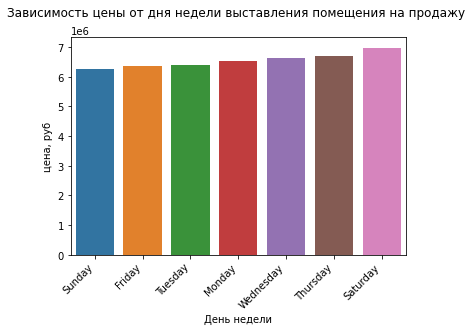

In [70]:
ax = sns.barplot(data = df.groupby('day_of_week')['last_price'].mean().reset_index().sort_values('last_price'), x='day_of_week', y = 'last_price')
ax.set_title('Зависимость цены от дня недели выставления помещения на продажу \n')
ax.set_xlabel(xlabel='День недели')
ax.set_ylabel(ylabel='цена, руб')
plt.xticks(rotation=45, ha='right')
new_labels = ['\\\n'.join(lable.get_text().split('/')) for lable in ax.xaxis.get_ticklabels()]
plt.show()

Зависимость цены от дня недели выставления квартиры крайне мала, разве что помещения выставленные в субботу имеют среднюю цену немного выше.

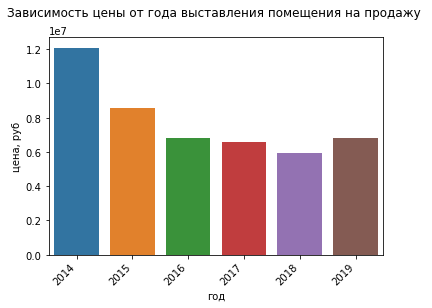

In [71]:
ax = sns.barplot(data = df.groupby('year')['last_price'].mean().reset_index().sort_values('last_price'), x='year', y = 'last_price')
ax.set_title('Зависимость цены от года выставления помещения на продажу \n')
ax.set_xlabel(xlabel='год')
ax.set_ylabel(ylabel='цена, руб')
plt.xticks(rotation=45, ha='right')
new_labels = ['\\\n'.join(lable.get_text().split('/')) for lable in ax.xaxis.get_ticklabels()]
plt.show()

А вот тут зависимость уже весьма и весьма заметна. В 2014 средняя стоимость помещения была намного выше, чем в последующие года. А в 2018 наблюдалась наименьшая стоимость.

In [72]:
df_grouped = df.pivot_table(values='price_per_meter', index='locality_name', aggfunc=['count', 'mean'])
df_grouped.columns = ('count', 'avg_price_per_meter')
df_grouped.sort_values(by ='count', ascending=False).head(10).sort_values(by ='avg_price_per_meter', ascending=False)

,count,avg_price_per_meter
locality_name,,
Санкт-Петербург,15721,114849.008794
Пушкин,369,103125.819291
деревня Кудрово,299,92473.547576
посёлок Парголово,327,90175.913458
посёлок Мурино,522,85752.189195
посёлок Шушары,440,78677.364217
Колпино,338,75424.579098
Гатчина,307,68746.146763
Всеволожск,398,68654.473986


Собственно здесь мы видим в каких населенных пунктах из 10 самых больших по количеству объявлений, самая высокая средняя цена за квадратный метр.

Text(0.5, 1.0, 'Зависимость цены от расстояния до центра города \n')

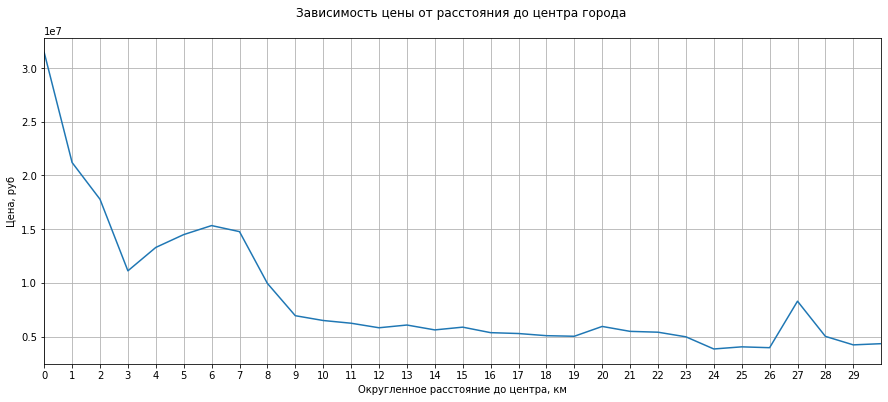

In [73]:
df_spb = df[df['locality_name'] == 'Санкт-Петербург'].copy()
df_spb['center_round'] = (df_spb['cityCenters_nearest'] / 1000).round()
df_spb_groupped = df_spb.groupby('center_round')['last_price'].mean()
ax = df_spb_groupped.plot(xlim=(0,30), grid=True, figsize=(15,6))
ax.set_xticks(list(range(0,30)))
ax.set_xlabel(xlabel='Округленное расстояние до центра, км')
ax.set_ylabel(ylabel='Цена, руб')
ax.set_title('Зависимость цены от расстояния до центра города \n')

Итак, по динамике графика мы видим, что зона "центра города" заканчивается примерно на 3 км.

Приступим к изучению квартир, находящихся в центре города. Изучим площадь, цену, число комнат и высоту потолков для квартир в центре:

In [74]:
df_spb_center = df_spb[df_spb['center_round'] <= 3].copy()
df_spb_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,879.000000,8.790000e+02,879.000000,879.000000
mean,98.632446,1.630205e+07,3.110353,3.069238
std,56.543138,2.645654e+07,1.486575,0.906031
min,12.000000,2.100000e+06,0.000000,2.500000
25%,63.300000,7.300000e+06,2.000000,2.650000
50%,85.000000,9.800000e+06,3.000000,3.000000
75%,116.500000,1.499500e+07,4.000000,3.300000
max,517.000000,4.013000e+08,14.000000,27.000000


В центре представлено жилье лучше чем в среднем по всему датафрейму. Тут и потолки выше, и средняя площадь больше. Но и цена, само собой, кусается.

Изучим факторы, влияющие на стоимость квартир в центре больше всего:

In [75]:
df_spb_center.corr()['last_price'].sort_values(ascending=False)

last_price             1.000000
price_per_meter        0.828229
total_area             0.565577
living_area            0.474717
kitchen_area           0.355750
rooms                  0.240349
floor                  0.224601
floors_total           0.200792
total_images           0.155351
balcony                0.133823
parks_around3000       0.105944
ponds_around3000       0.060171
airports_nearest       0.034224
ceiling_height         0.031680
days_exposition        0.022574
open_plan             -0.022579
year                  -0.024959
studio                -0.025383
living_total_raito    -0.043665
parks_nearest         -0.068642
ponds_nearest         -0.092314
kitchen_total_raito   -0.095795
cityCenters_nearest   -0.164656
center_round          -0.180389
Name: last_price, dtype: float64

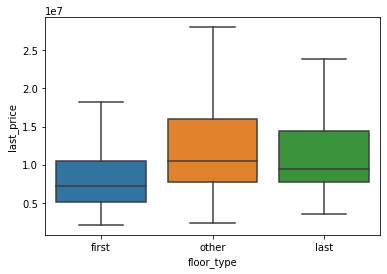

In [76]:
ax = sns.boxplot(data = df_spb_center, x='floor_type', y='last_price', showfliers=False)

Все также продолжает влиять площадь помещения, жилая и кухонная площадь, количество комнат, этаж и количество этажей. Но также стоит отметить, что возрастает влияние таких факторов, как количество изображений в объявлении и уменьшается влияние наличия парков или водоемов в радиусе 3 км.

## Общий вывод

Безусловно неджижимость не в центре и в центре города отличается как по ценам, так и по другим параметрам. Например ближе к центру города начинают меньше оказывать влияние на цену квартиры такие факторы как наличие парков и водоемов в радиусе 3 км. Но в целом влияние факторов более-менее одинаковое. Следует отметить, что цена на недвижимось сильно изменилась с 2014 года. Также мы обнаружили что цена зависит как и от дня выставления, так и от месяца выставления помещения на продажу. Но в целом влияние временного фактора (кроме года продажи) не оказывает сильного влияния. Очень сильно влияет на цену расположение помещения. В Крупных городах цена за квадратный метр значительно выше. Также можно заметить, что цена на помещения на первом этаже гораздо ниже цены помещений на других этажах.